# Plotting on map images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Załadowanie zdjęcia planu korytarza czwartego piętra w pobliżu sali 432

In [2]:
im = plt.imread('plan_img.png')

# Załadowanie wszystkich przeprowadzonych pomiarów z pliku csv

In [15]:
df = pd.read_csv('out_df.csv')
df_len = df.shape[0]
unique_ssid_count = df['essid'].dropna().unique().shape[0]
unique_ap_count = df['mac'].dropna().unique().shape[0]
print(f"Liczba unikatowych ssid: {unique_ssid_count}")
print(f"Liczba punktów dostępowych: {unique_ap_count}")

Liczba unikatowych ssid: 88
Liczba punktów dostępowych: 258


In [4]:
# Wybieranie kolumn 'x' i 'y' z DataFrame df
df_coordinates = df[['x', 'y']]
# Usuwanie zduplikowanych punktów
df_unique_points = df_coordinates.drop_duplicates()
x = df_unique_points['x']/100
y = df_unique_points['y']/100

# Wyrysowanie otrzymanych pomiarów na planie korytarza czwartego piętra w pobliżu sali 432

In [5]:
def plot_on_map(x, y, is_color=False, c=None, cmap=None): 
    # Ustawienie rozmiaru rysunku na 8x8 cali
    plt.figure(figsize=(8,8))
    # Ustawienie równych proporcji osi, aby zapewnić poprawne proporcje
    plt.axes().set_aspect('equal')
    
    implot = plt.imshow(im, extent = [-54.17, 5.90, -5.67 ,51.47])
    if is_color:
        plt.scatter(x,y, marker='o', c=c, cmap=cmap)
    else:
        plt.scatter(x,y, marker='o')
    
    # Dodanie etykiet osi x i y 
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')

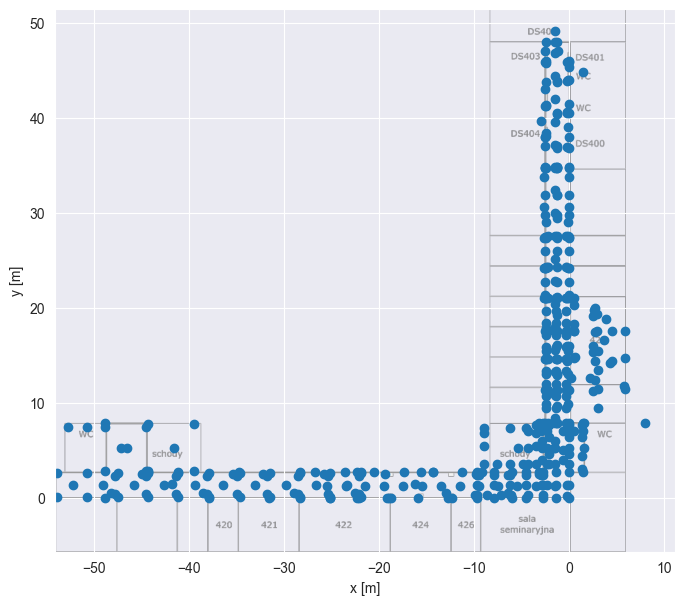

In [6]:
plot_on_map(x, y, False)

# Szacowane położenie punktu dostępowego sieci DS404

In [17]:
# Filtrowanie Data Frame po sieci o nazwie 'DS404'
df_filter = df[df['essid'] == 'DS404']
x_f = df_filter['x']/100
y_f = df_filter['y']/100
# Zapisanie Rssi (poziomu sygnału) dla każdego pomiaru z przefiltrowanych pomiarów
level = df_filter['rssi']

# Narysowanie odczytanych pomiarów wraz ze skalą kolorów pokazującą poziom sygnału Rssi
plot_on_map(x_f, y_f, True, c=level, cmap='plasma')
plt.scatter(-8, 36, marker="*") # Szacowana lokalizacja routera
plt.show()

# Szacowane położenie punktu dostępowego sieci airlive

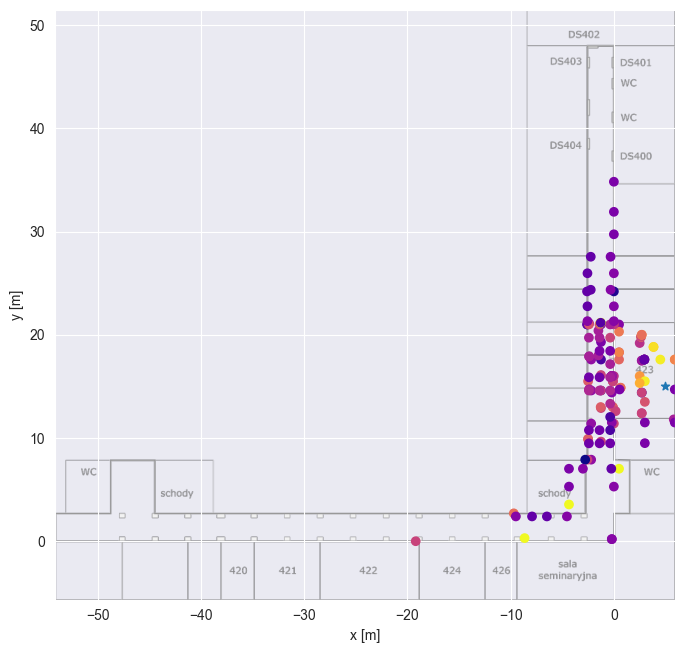

In [23]:
# Powtórzenie powyższej czynności dla sieci 'airlive'
df_filter = df[df['essid'] == 'airlive']
x_f = df_filter['x']/100
y_f = df_filter['y']/100
level = df_filter['rssi']

plot_on_map(x_f, y_f, True, c=level, cmap='plasma')
plt.scatter(5, 15, marker="*") # Szacowana lokalizacja routera
plt.show()